# Toronto Restaurants EDA

This part of the notebook provides an exploratory data analysis (EDA) of the Toronto Restaurants dataset. We'll examine the structure, summary statistics, missing values, unique values.

## 1. Import Libraries

We'll use pandas for data manipulation, matplotlib and seaborn for visualization.

In [3]:
# EDA for Toronto Restaurants Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from difflib import get_close_matches

## 2. Load Dataset

Let's load the dataset and preview the first few rows.

In [4]:
# Load the dataset
df = pd.read_csv("trt_rest.csv")

# Display basic info
df.head()

,Category,Restaurant Address,Restaurant Name,Restaurant Phone,Restaurant Price Range,Restaurant Website,Restaurant Yelp URL,Restaurant Latitude,Restaurant Longitude
0,Afghan,"14 Prince Arthur Avenue\nToronto, ON M5R 1A9",The Host,(416) 962-4678,$11-30,welcometohost.com,https://www.yelp.ca/adredir?ad_business_id=OFA...,43.669935,-79.395858
1,Afghan,"259 Wellington St W\nToronto, ON M5V",Aanch Modernist Indian Cuisine,(647) 558-1508,$11-30,aanch.ca,https://www.yelp.ca/adredir?ad_business_id=SZu...,43.644708,-79.390670
2,Afghan,"736 Bay Street\nToronto, ON M5G 2J8",Silk Road Kabob House,NaN,Under $10,NaN,https://www.yelp.ca/biz/silk-road-kabob-house-...,43.659816,-79.385591
3,Afghan,"691 Yonge Street\nToronto, ON M4Y 2B2",Naan & Kabob,(416) 972-6623,$11-30,naanandkabob.ca,https://www.yelp.ca/biz/naan-and-kabob-toronto-5,43.669058,-79.386100
4,Afghan,"66 Overlea Boulevard\nUnit 62\nToronto, ON M4H...",Afghan Cuisine,(416) 422-5858,$11-30,afghancuisinerestaurant.com,https://www.yelp.ca/biz/afghan-cuisine-toronto,43.708070,-79.341508


## 3. Display Basic Information

We'll check the structure and data types of the DataFrame.

In [5]:
# Basic structure
df.info()

# Summary statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15821 entries, 0 to 15820
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                15821 non-null  object 
 1   Restaurant Address      15773 non-null  object 
 2   Restaurant Name         15821 non-null  object 
 3   Restaurant Phone        15116 non-null  object 
 4   Restaurant Price Range  11541 non-null  object 
 5   Restaurant Website      10976 non-null  object 
 6   Restaurant Yelp URL     15821 non-null  object 
 7   Restaurant Latitude     15773 non-null  float64
 8   Restaurant Longitude    15773 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


,Category,Restaurant Address,Restaurant Name,Restaurant Phone,Restaurant Price Range,Restaurant Website,Restaurant Yelp URL,Restaurant Latitude,Restaurant Longitude
count,15821,15773,15821,15116,11541,10976,15821,15773.000000,15773.000000
unique,126,7892,6504,7570,5,3385,11450,NaN,NaN
top,Pizza,"406 Dupont Street\nToronto, ON M5R 1V9",Subway,(416) 967-1111,$11-30,pizzapizza.ca,https://www.yelp.ca/biz/beiruti-grand-caf%C3%A...,NaN,NaN
freq,1065,169,298,260,7059,252,4,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.695051,-79.406573
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060082,0.082616
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.088529,-80.153305
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.652368,-79.445668
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.673829,-79.398589
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.738522,-79.366084


## 4. Unique Values per Column

Let's print the number of unique values for each column to understand categorical diversity.

In [6]:
# Unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Category: 126 unique values
Restaurant Address: 7892 unique values
Restaurant Name: 6504 unique values
Restaurant Phone: 7570 unique values
Restaurant Price Range: 5 unique values
Restaurant Website: 3385 unique values
Restaurant Yelp URL: 11450 unique values
Restaurant Latitude: 7344 unique values
Restaurant Longitude: 7448 unique values


## 5. Check duplication

In [7]:
duplicates = df[df.duplicated(keep=False)]
print(f"Number of duplicate rows:", duplicates.shape[0])
duplicates

Number of duplicate rows: 12


,Category,Restaurant Address,Restaurant Name,Restaurant Phone,Restaurant Price Range,Restaurant Website,Restaurant Yelp URL,Restaurant Latitude,Restaurant Longitude
9927,Lebanese,"236 Sherbourne Street\nToronto, ON M5A 2R7",Marhaba Lebanese Cuisine,(647) 349-6338,NaN,marhabarestaurant.com,https://www.yelp.ca/biz/marhaba-lebanese-cuisi...,43.658116,-79.371049
9929,Lebanese,"236 Sherbourne Street\nToronto, ON M5A 2R7",Marhaba Lebanese Cuisine,(647) 349-6338,NaN,marhabarestaurant.com,https://www.yelp.ca/biz/marhaba-lebanese-cuisi...,43.658116,-79.371049
11530,Pizza,"979 Bloor Street W\nToronto, ON M6H 1L5",Pizza Pizza,(416) 967-1111,Under $10,pizzapizza.ca,https://www.yelp.ca/biz/pizza-pizza-toronto-8,43.661054,-79.429089
11533,Pizza,"979 Bloor Street W\nToronto, ON M6H 1L5",Pizza Pizza,(416) 967-1111,Under $10,pizzapizza.ca,https://www.yelp.ca/biz/pizza-pizza-toronto-8,43.661054,-79.429089
11541,Pizza,"820 Sheppard Avenue W\nToronto, ON M3H 2T1",Domino’s Pizza,(416) 636-3888,NaN,dominos.ca,https://www.yelp.ca/biz/dominos-pizza-toronto-20,43.753130,-79.450904
11542,Pizza,"810 Church Street\nToronto, ON M4W 2M4",Pizza Hut,(416) 927-7700,$11-30,pizzahut.ca,https://www.yelp.ca/biz/pizza-hut-toronto-23,43.671973,-79.385281
11544,Pizza,"810 Church Street\nToronto, ON M4W 2M4",Pizza Hut,(416) 927-7700,$11-30,pizzahut.ca,https://www.yelp.ca/biz/pizza-hut-toronto-23,43.671973,-79.385281
11547,Pizza,"820 Sheppard Avenue W\nToronto, ON M3H 2T1",Domino’s Pizza,(416) 636-3888,NaN,dominos.ca,https://www.yelp.ca/biz/dominos-pizza-toronto-20,43.753130,-79.450904
12000,Pizza,"1396 Don Mills Road\nSuite 52\nNorth York, AB ...",Domino’s Pizza,(647) 352-5055,NaN,order.dominos.ca/en,https://www.yelp.ca/biz/dominos-pizza-north-yo...,43.748826,-79.347592
12001,Pizza,"8 Green Lane\nUnit 12\nMarkham, ON L3T 7P7",Pizza Nova,(905) 731-1881,Under $10,pizzanova.com,https://www.yelp.ca/biz/pizza-nova-markham-8,43.821587,-79.399930


In [8]:
# Remove duplicate rows
df_clean = df.drop_duplicates()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15815 entries, 0 to 15820
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                15815 non-null  object 
 1   Restaurant Address      15767 non-null  object 
 2   Restaurant Name         15815 non-null  object 
 3   Restaurant Phone        15110 non-null  object 
 4   Restaurant Price Range  11538 non-null  object 
 5   Restaurant Website      10970 non-null  object 
 6   Restaurant Yelp URL     15815 non-null  object 
 7   Restaurant Latitude     15767 non-null  float64
 8   Restaurant Longitude    15767 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.2+ MB


## 6. Missing Values Analysis

We'll calculate and display the number of missing values in each column.

In [9]:
# Count missing values
df_clean.isnull().sum().sort_values(ascending=False)

Restaurant Website        4845
Restaurant Price Range    4277
Restaurant Phone           705
Restaurant Address          48
Restaurant Latitude         48
Restaurant Longitude        48
Category                     0
Restaurant Name              0
Restaurant Yelp URL          0
dtype: int64

### Price Range

In [10]:
# Check unique categories
print(df_clean['Restaurant Price Range'].value_counts())

Restaurant Price Range
$11-30       7058
Under $10    3363
$31-60       1023
Above $61      91
US$11-30        3
Name: count, dtype: int64


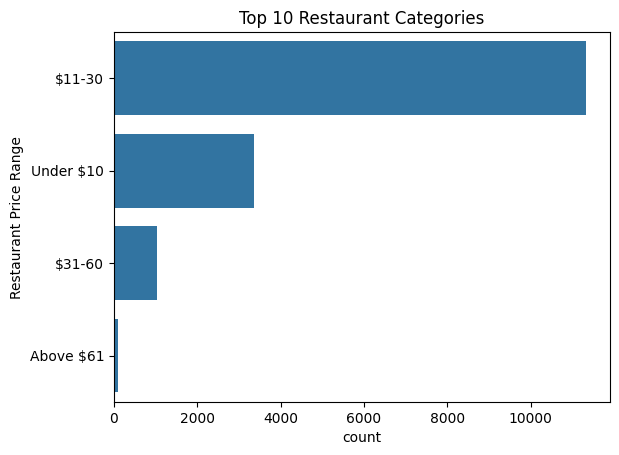

In [11]:
# Remove rows where Restaurant Price Range is 'US$11-30'
df_clean = df_clean[df_clean['Restaurant Price Range'] != 'US$11-30']

# Fill missing values with the mode
mode_price = df_clean['Restaurant Price Range'].mode()[0]
df_clean['Restaurant Price Range'] = df_clean['Restaurant Price Range'].fillna(mode_price)

# Check result
sns.countplot(y='Restaurant Price Range', data=df_clean, order=df_clean['Restaurant Price Range'].value_counts().index)
plt.title('Top 10 Restaurant Categories')
plt.show()

### Category

In [12]:
# Check unique categories
print(df_clean['Category'].value_counts())

Category
Pizza                   1060
Sandwiches              1029
Chinese                  909
Fast Food                812
Italian                  802
                        ... 
Slovakian                  2
Burmese                    1
Pop-Up Restaurants         1
Hong Kong Style Cafe       1
Mauritius                  1
Name: count, Length: 126, dtype: int64


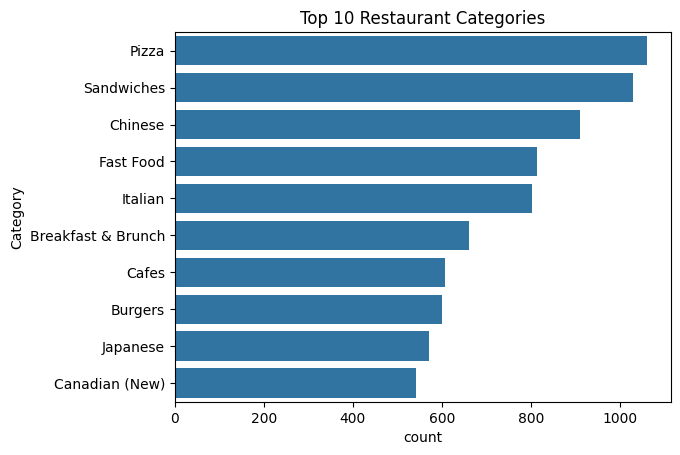

In [13]:
sns.countplot(y='Category', data=df_clean, order=df_clean['Category'].value_counts().head(10).index)
plt.title('Top 10 Restaurant Categories')
plt.show()

### Location (Latitude and Longitude)

In [14]:
df_clean.dropna(subset=['Restaurant Address', 'Restaurant Latitude', 'Restaurant Longitude'], inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15764 entries, 0 to 15820
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                15764 non-null  object 
 1   Restaurant Address      15764 non-null  object 
 2   Restaurant Name         15764 non-null  object 
 3   Restaurant Phone        15098 non-null  object 
 4   Restaurant Price Range  15764 non-null  object 
 5   Restaurant Website      10960 non-null  object 
 6   Restaurant Yelp URL     15764 non-null  object 
 7   Restaurant Latitude     15764 non-null  float64
 8   Restaurant Longitude    15764 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.2+ MB


In [15]:
# Count missing values
df_clean.isnull().sum().sort_values(ascending=False)

Restaurant Website        4804
Restaurant Phone           666
Category                     0
Restaurant Address           0
Restaurant Name              0
Restaurant Price Range       0
Restaurant Yelp URL          0
Restaurant Latitude          0
Restaurant Longitude         0
dtype: int64

# Building the recommendation system

## Data Preprocessing

In [16]:
# Copy the DataFrame for Preprocessing
df_features = df_clean.copy()

### Encode Price Range

In [17]:
# Define the order for price ranges
price_order = [
    'Under $10',
    '$11-30',  
    '$31-60',
    'Above $61'
]

# Create a mapping dictionary
price_map = {price: idx for idx, price in enumerate(price_order)}

# Encode into a new column
df_features['Price_Encoded'] = df_features['Restaurant Price Range'].map(price_map)


### One-Hot Encode Category

In [18]:
# One-hot encode category
category_encoded = pd.get_dummies(df_features['Category'], prefix='cat')

# Add to feature DataFrame
df_features = pd.concat([df_features, category_encoded], axis=1)


### Normalize Latitude & Longitude

In [19]:
scaler = MinMaxScaler()
df_features[['Lat_Scaled', 'Lon_Scaled']] = scaler.fit_transform(
    df_features[['Restaurant Latitude', 'Restaurant Longitude']]
)

In [20]:
# Collect columns for the feature matrix
feature_cols = ['Price_Encoded', 'Lat_Scaled', 'Lon_Scaled'] + list(category_encoded.columns)

# Final feature matrix
feature_matrix = df_features[feature_cols].values

feature_matrix.shape  # Check the shape of the feature matrix

(15764, 129)

### Using cosine similarity for recommender

In [21]:
def recommend_similar(restaurant_name, df_features, feature_matrix, top_n=10,
                      name_col="Restaurant Name", extra_cols=None):
    if extra_cols is None:
        extra_cols = [
            "Category",
            "Restaurant Price Range",
            "Restaurant Address",
        ]

    matches = df_features.index[
        df_features[name_col].str.lower() == restaurant_name.lower()
    ].tolist()

    if not matches:
        suggestions = get_close_matches(
            restaurant_name, df_features[name_col].unique(), n=5, cutoff=0.6
        )
        raise ValueError(
            f"No exact match for '{restaurant_name}'. "
            f"Close matches: {', '.join(suggestions) if suggestions else 'None'}"
        )

    idx = matches[0]
    sim = cosine_similarity(feature_matrix[idx:idx+1], feature_matrix).ravel()
    sim[idx] = -1.0

    top_idx = np.argsort(sim)[::-1][:top_n]

    cols_to_show = [name_col] + [c for c in extra_cols if c in df_features.columns]
    result = df_features.iloc[top_idx][cols_to_show].copy()
    result.insert(1, "Similarity", sim[top_idx].round(4))

    return result.reset_index(drop=True)

In [22]:
# Example: get top 10 similar to a known restaurant
try:
    recs = recommend_similar(
        "Spicy Mafia",
        df_features=df_features,
        feature_matrix=feature_matrix,
        top_n=10
    )
    print(recs)
except ValueError as e:
    print(e)

                   Restaurant Name  Similarity Category  \
0             Jasmine Chinese Food      1.0000  Chinese   
1            Paul Kee Open Kitchen      1.0000  Chinese   
2                    Spice & Aroma      1.0000  Chinese   
3                    Red Tea House      1.0000  Chinese   
4                       M&Y Bakery      0.9999  Chinese   
5             Wei’s Taiwanese Food      0.9999  Chinese   
6          D & R Wing’s Restaurant      0.9999  Chinese   
7                      Yogi Noodle      0.9999  Chinese   
8  Yunnan Cross Bridge Rice Noodle      0.9999  Chinese   
9                         Tsui Wah      0.9999  Chinese   

  Restaurant Price Range                                 Restaurant Address  
0              Under $10  Bridlewood Mall\n2900 Warden Avenue, Suite 258...  
1              Under $10      2950 Birchmount Road\nScarborough, ON M1W 3G5  
2              Under $10          3330 Pharmacy Avenue\nToronto, ON M1W 3V8  
3              Under $10           290

### (Optional) Weight location vs. category vs. price

You may want location to matter more/less than category or price. Easiest way: scale those feature columns before building feature_matrix.

In [23]:
# Example weights: make location count a bit less than category; price moderate
W_PRICE = 1.0
W_LOC   = 0.5   # smaller = counts less
# Multiply the scaled location columns; price stays as is
df_features["Lat_Scaled_w"] = df_features["Lat_Scaled"] * W_LOC
df_features["Lon_Scaled_w"] = df_features["Lon_Scaled"] * W_LOC
df_features["Price_Encoded_w"] = df_features["Price_Encoded"] * W_PRICE

# Then rebuild your feature list to use the weighted columns:
feature_cols = (
    ["Price_Encoded_w", "Lat_Scaled_w", "Lon_Scaled_w"]
    + [c for c in df_features.columns if c.startswith("cat_")]
)
feature_matrix = df_features[feature_cols].values


In [24]:
# Example: get top 10 similar to a known restaurant with weighted features
try:     
    recs_weighted = recommend_similar(
        "Spicy Mafia",
        df_features=df_features,
        feature_matrix=feature_matrix,
        top_n=10
    )
    print(recs_weighted)
except ValueError as e:
    print(e)

                   Restaurant Name  Similarity Category  \
0             Jasmine Chinese Food         1.0  Chinese   
1            Paul Kee Open Kitchen         1.0  Chinese   
2                    Spice & Aroma         1.0  Chinese   
3                       M&Y Bakery         1.0  Chinese   
4             Wei’s Taiwanese Food         1.0  Chinese   
5                    Red Tea House         1.0  Chinese   
6                      Yogi Noodle         1.0  Chinese   
7          D & R Wing’s Restaurant         1.0  Chinese   
8  Yunnan Cross Bridge Rice Noodle         1.0  Chinese   
9                         Tsui Wah         1.0  Chinese   

  Restaurant Price Range                                 Restaurant Address  
0              Under $10  Bridlewood Mall\n2900 Warden Avenue, Suite 258...  
1              Under $10      2950 Birchmount Road\nScarborough, ON M1W 3G5  
2              Under $10          3330 Pharmacy Avenue\nToronto, ON M1W 3V8  
3              Under $10  3601 Victori

# 📌 Conclusion

In this project, I developed a content-based recommendation system for Toronto restaurants using features derived from the dataset, including cuisine category, price range, and geographic location. The workflow involved:

- **Data Exploration**: Identified missing values, assessed the quality of the dataset, and understood the distribution of categories and prices.

- **Data Cleaning & Feature Engineering**: Converted price ranges to numeric values, one-hot encoded categorical cuisines, and scaled latitude/longitude to make them suitable for similarity calculations.

- **Modeling**: Constructed a feature matrix and applied cosine similarity to identify restaurants with similar attributes.

- **Recommendations**: Implemented a function to suggest the Top-10 most similar restaurants for a given input, producing results that align well in cuisine, price, and location.

The recommender demonstrates that even without user ratings or reviews, restaurant metadata can be leveraged effectively to generate useful, context-aware recommendations.